# Lab №4 Loshak Viktor IP-11
## Task:
1) Download data from the Data2.csv file.
2) Look, analyze the structure
3) Indicate if normally distributed parameters exist
4) Test the hypothesis that the mean and median are equal for one of the parameters
5) Indicate in which region the distribution of CO2 emissions is closest to normal
6) Create a pie chart of the population by region

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

1) First let's upload the data into dataframe and clean it up in the similar fashion to the previous lab 3.

In [25]:
df=pd.read_csv('Data2.csv', sep=';', encoding='cp1251')
df=df.rename(columns={'Populatiion':'Population', 'GDP per capita': 'GDP per capital'})

clean_df=df.copy().dropna()
clean_df['GDP per capital'] = clean_df['GDP per capital'].str.replace(',', '.').astype(float)
clean_df['CO2 emission'] = clean_df['CO2 emission'].str.replace(',','.').astype(float)
clean_df['Area'] = clean_df['Area'].str.replace(',','.').astype(float)
clean_df.loc[:, clean_df.dtypes=='float'] = clean_df.select_dtypes(include=['float64']).abs()

clean_df

,Country Name,Region,GDP per capital,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0
5,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160,1246700.0
...,...,...,...,...,...,...
209,Vanuatu,East Asia & Pacific,2860.566475,270402.0,154.014,12190.0
211,Vietnam,East Asia & Pacific,2170.648054,92701100.0,166910.839,330967.0
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0


2. Let's visualize numeric columns of the dataframe to get some intuition about it`s distributions.

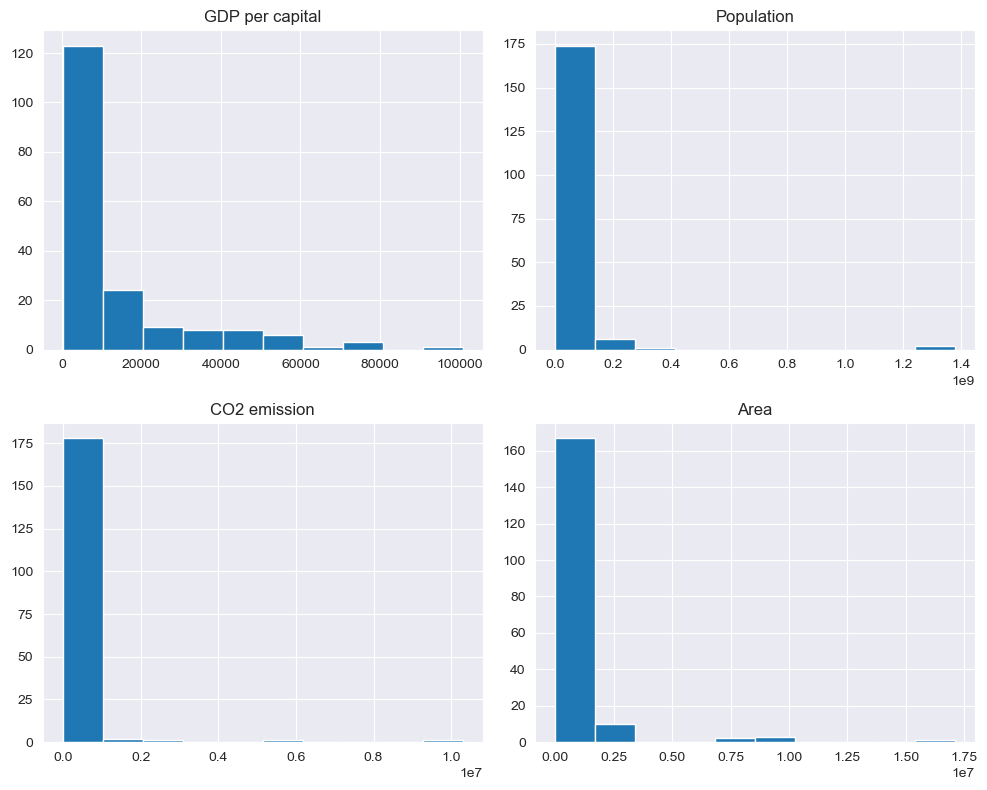

In [20]:
numeric_cols = clean_df.select_dtypes(include='float')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Iterate over the columns and plot the histograms
for i, col_name in enumerate(numeric_cols.columns):
    row = i // 2
    col = i % 2
    axs[row, col].hist(numeric_cols[col_name], bins=10)
    axs[row, col].set_title(col_name)

# Display the plot
plt.tight_layout()
plt.show()

3. It can be inferred from plots that the columns are most likely not distributed normally, to double-check let's use *Shapiro-Wilk test* with confidence level 0.05


In [24]:
for col in numeric_cols:
    stat, p = stats.shapiro(clean_df[col])
    alpha = 0.05
    if p > alpha:
        print(f"{col} is normally distributed (p={p:.3f})")
    else:
        print(f"{col} is not normally distributed (p={p:.3f})")

GDP per capital is not normally distributed (p=0.000)
Population is not normally distributed (p=0.000)
CO2 emission is not normally distributed (p=0.000)
Area is not normally distributed (p=0.000)


4. To check the hypothesis about the equality of mean and median for one of the parameters I will use signed Wilcoxon test with confidence level 0.05

In [34]:
alpha = 0.05

for i, col_name in enumerate(numeric_cols.columns):
    temp = clean_df[col_name] - clean_df[col_name].median()
    stat, p = stats.wilcoxon(temp)
    print(f"Wilcoxon signed-rank test for {col_name}")
    print(f"  Test statistic: {stat:.4f}")
    print(f"  p-value: {p:.4f}")
    if p < alpha:
        print("  Reject null hypothesis: mean and median are not equal")
    else:
        print("  Fail to reject null hypothesis: mean and median are equal")


Wilcoxon signed-rank test for GDP per capital
  Test statistic: 6053.0000
  p-value: 0.0014
  Reject null hypothesis: mean and median are not equal
Wilcoxon signed-rank test for Population
  Test statistic: 6247.0000
  p-value: 0.0035
  Reject null hypothesis: mean and median are not equal
Wilcoxon signed-rank test for CO2 emission
  Test statistic: 5259.0000
  p-value: 0.0000
  Reject null hypothesis: mean and median are not equal
Wilcoxon signed-rank test for Area
  Test statistic: 5109.0000
  p-value: 0.0000
  Reject null hypothesis: mean and median are not equal


5. To check in what region the parameter distribution is closest to normal we can use Shapiro-Wilk test on the grouped data.

In [36]:
grouped_df = clean_df.groupby('Region')

closest_to_normal = ()
# loop through each group and perform the Shapiro-Wilk test for normality on the CO2 emission column
for name, group in grouped_df:
    group_length=len(group["CO2 emission"])
    print(f'group length: {group_length} region name: {name}')

    if group_length>3:
        sw_stat, p_value = stats.shapiro(group['CO2 emission'])
        if not closest_to_normal or closest_to_normal[1]<p_value:
            closest_to_normal=(name, p_value)

        if p_value > 0.05:
            print(f"The {name} region has a normal distribution of CO2 emissions (p-value={p_value}).")
        else:
            print(f"The {name} region does not have a normal distribution of CO2 emissions (p-value={p_value}).")
    else:
        print(f"The {name} region's CO2 emission distribution is too small to be tested using given test type")

print(f'\nThe CO2 emission distribution is closest to normal in the region: {closest_to_normal[0]}\nWith p_value equal to: {closest_to_normal[1]}')

group length: 31 region name: East Asia & Pacific
The East Asia & Pacific region does not have a normal distribution of CO2 emissions (p-value=1.7853494724273666e-11).
group length: 49 region name: Europe & Central Asia
The Europe & Central Asia region does not have a normal distribution of CO2 emissions (p-value=3.875299386946196e-12).
group length: 31 region name: Latin America & Caribbean
The Latin America & Caribbean region does not have a normal distribution of CO2 emissions (p-value=1.445848663017557e-09).
group length: 17 region name: Middle East & North Africa
The Middle East & North Africa region does not have a normal distribution of CO2 emissions (p-value=7.30708779883571e-05).
group length: 2 region name: North America
The North America region's CO2 emission distribution is too small to be tested using given test type
group length: 8 region name: South Asia
The South Asia region does not have a normal distribution of CO2 emissions (p-value=4.837930646317545e-06).
group leng

6. Now let's display the pie-chart for the population in every region

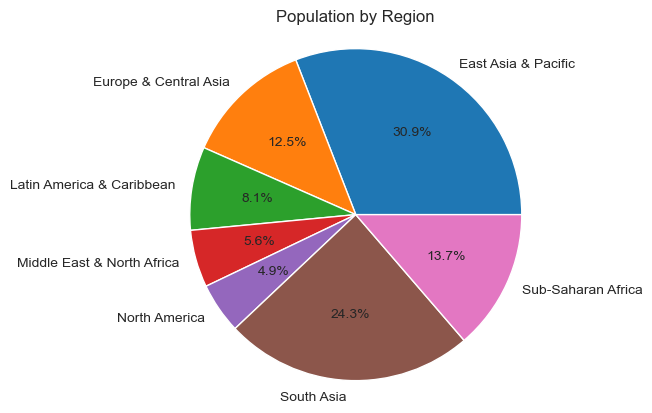

In [38]:
region_populations = grouped_df['Population'].sum()

# Create a pie chart of the population by region
plt.pie(region_populations, labels=region_populations.index, autopct='%1.1f%%')
plt.title('Population by Region')
plt.axis('equal')
plt.show()